In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import ast
from tqdm import tqdm
import time
from collections import Counter
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [266]:
test=pd.read_csv('data/test.csv')
train=pd.read_csv('data/train.csv') 

In [267]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [268]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [269]:
train.shape

(3000, 23)

In [270]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [271]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [272]:
train.isnull().sum() 

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [273]:
test.isnull().sum() 

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [274]:
train['poster_path'].unique().shape # poster path is of no use 3000 unique vals

(3000,)

In [275]:
train['belongs_to_collection'][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [276]:
sorted(train['homepage'].value_counts(),reverse=True) # homepage is of no use 3000 unique vals

[4,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [277]:
# removing id,homepage, post_path and belongs_to_collection columns (out of 3000 entries 2396 are null 'in belongs_to_collection' column)
# dropping original title column because it is in regional languages like japanese , czeck and chinese

train.drop(['id','homepage','poster_path','belongs_to_collection','tagline','overview','original_title'],axis=1,inplace=True)
test.drop(['id','homepage','poster_path','belongs_to_collection','tagline','overview','original_title'],axis=1,inplace=True) 

In [278]:
sorted(train['title'].unique())

["'71",
 '(500) Days of Summer',
 '10 Cloverfield Lane',
 '10 Items or Less',
 '10 Things I Hate About You',
 '10 to Midnight',
 '10,000 BC',
 '10th & Wolf',
 '12 Rounds',
 '13',
 '13 Assassins',
 '13 Hours: The Secret Soldiers of Benghazi',
 '13 Minutes',
 '1492: Conquest of Paradise',
 '15 Minutes',
 '1969',
 '2 Days in Paris',
 '20,000 Leagues Under the Sea',
 '2010',
 '21',
 '21 & Over',
 '21 Grams',
 '22 Jump Street',
 '25th Hour',
 '28 Days Later',
 '2:22',
 '3 Braves',
 '3 Godfathers',
 '3 Strikes',
 '300: Rise of an Empire',
 '31',
 '4 Months, 3 Weeks and 2 Days',
 '4.3.2.1',
 '48 Hrs.',
 '49 Up',
 '5 Flights Up',
 '50 First Dates',
 '54',
 '55 Days at Peking',
 '8MM',
 '9',
 'A Band Called Death',
 'A Beautiful Mind',
 'A Better Life',
 'A Better Tomorrow',
 'A Bigger Splash',
 'A Bridge Too Far',
 'A Case of You',
 'A Chorus Line',
 'A Cinderella Story',
 'A Civil Action',
 'A Clockwork Orange',
 'A Coffee in Berlin',
 'A Company Man',
 'A Dirty Shame',
 "A Dog's Purpose",
 '

### Can we make a column to check if the movie is sequel of previous movies or next part of the movie ?
### Will do later

### is there any use of imdb_id ? will see later..

In [279]:
cnt={}
for i in train['imdb_id']:
    if i[0:4] not in cnt.keys():
        cnt[i[0:4]]=1
    else:
        cnt[i[0:4]]+=1
print(cnt)
print(sorted(cnt.keys()))

{'tt26': 15, 'tt03': 227, 'tt25': 13, 'tt18': 41, 'tt13': 49, 'tt00': 638, 'tt04': 233, 'tt01': 579, 'tt11': 70, 'tt17': 52, 'tt14': 62, 'tt21': 33, 'tt16': 65, 'tt07': 31, 'tt02': 180, 'tt29': 16, 'tt27': 16, 'tt34': 10, 'tt09': 37, 'tt32': 7, 'tt10': 62, 'tt12': 74, 'tt28': 17, 'tt38': 15, 'tt24': 31, 'tt08': 77, 'tt15': 50, 'tt52': 5, 'tt31': 11, 'tt20': 38, 'tt33': 15, 'tt56': 5, 'tt23': 39, 'tt22': 22, 'tt44': 9, 'tt49': 7, 'tt19': 31, 'tt36': 8, 'tt46': 8, 'tt42': 10, 'tt66': 1, 'tt50': 5, 'tt30': 12, 'tt37': 16, 'tt40': 7, 'tt45': 5, 'tt65': 1, 'tt43': 6, 'tt51': 3, 'tt39': 3, 'tt35': 6, 'tt41': 8, 'tt47': 5, 'tt62': 1, 'tt54': 2, 'tt48': 4, 'tt57': 1, 'tt58': 1, 'tt55': 2, 'tt59': 1, 'tt60': 1, 'tt53': 1}
['tt00', 'tt01', 'tt02', 'tt03', 'tt04', 'tt07', 'tt08', 'tt09', 'tt10', 'tt11', 'tt12', 'tt13', 'tt14', 'tt15', 'tt16', 'tt17', 'tt18', 'tt19', 'tt20', 'tt21', 'tt22', 'tt23', 'tt24', 'tt25', 'tt26', 'tt27', 'tt28', 'tt29', 'tt30', 'tt31', 'tt32', 'tt33', 'tt34', 'tt35', 'tt3

In [280]:
len(cnt) 

62

In [281]:
cnt={}
for i in test['imdb_id']:
    if i[0:4] not in cnt.keys():
        cnt[i[0:4]]=1
    else:
        cnt[i[0:4]]+=1
print(cnt)
print(sorted(cnt.keys()))
print(len(cnt))

{'tt12': 103, 'tt00': 945, 'tt01': 839, 'tt04': 364, 'tt15': 92, 'tt02': 239, 'tt36': 22, 'tt03': 329, 'tt08': 102, 'tt22': 49, 'tt10': 83, 'tt17': 81, 'tt21': 43, 'tt19': 53, 'tt29': 19, 'tt23': 71, 'tt38': 13, 'tt18': 55, 'tt16': 95, 'tt32': 19, 'tt09': 73, 'tt07': 40, 'tt13': 85, 'tt33': 20, 'tt11': 105, 'tt45': 9, 'tt20': 37, 'tt40': 15, 'tt14': 87, 'tt30': 21, 'tt34': 18, 'tt25': 27, 'tt24': 30, 'tt49': 4, 'tt27': 19, 'tt41': 14, 'tt56': 3, 'tt31': 15, 'tt47': 9, 'tt42': 14, 'tt35': 16, 'tt28': 17, 'tt46': 9, 'tt37': 21, 'tt43': 10, 'tt54': 4, 'tt26': 12, 'tt58': 2, 'tt48': 9, 'tt60': 1, 'tt39': 4, 'tt59': 2, 'tt51': 4, 'tt53': 4, 'tt57': 3, 'tt50': 6, 'tt44': 7, 'tt52': 3, 'tt62': 2, 'tt55': 1}
['tt00', 'tt01', 'tt02', 'tt03', 'tt04', 'tt07', 'tt08', 'tt09', 'tt10', 'tt11', 'tt12', 'tt13', 'tt14', 'tt15', 'tt16', 'tt17', 'tt18', 'tt19', 'tt20', 'tt21', 'tt22', 'tt23', 'tt24', 'tt25', 'tt26', 'tt27', 'tt28', 'tt29', 'tt30', 'tt31', 'tt32', 'tt33', 'tt34', 'tt35', 'tt36', 'tt37', '

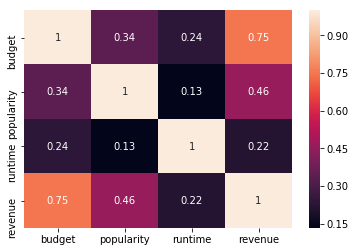

In [282]:
sns.heatmap(train.corr(),annot=True)

## Data Cleaning and Feauture engineering

In [283]:
train.head()

,budget,genres,imdb_id,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [284]:
train['genres'][101]

"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]"

In [285]:
train['production_companies'][201]

"[{'name': 'De Laurentiis Entertainment Group (DEG)', 'id': 484}, {'name': 'Kestrel Films', 'id': 27023}, {'name': 'Earth Girls', 'id': 78875}]"

In [286]:
train['production_countries'][201]

"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [287]:
train['spoken_languages'][201]

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [288]:
train['Keywords'][201]

"[{'id': 246, 'name': 'dancing'}, {'id': 572, 'name': 'sex'}, {'id': 1566, 'name': 'dream'}, {'id': 4344, 'name': 'musical'}, {'id': 6149, 'name': 'police'}, {'id': 7984, 'name': 'bikini'}, {'id': 8181, 'name': 'swimming pool'}, {'id': 9749, 'name': 'beauty salon'}, {'id': 9799, 'name': 'romantic comedy'}, {'id': 9831, 'name': 'spaceship'}, {'id': 9840, 'name': 'romance'}, {'id': 9951, 'name': 'alien'}, {'id': 11128, 'name': 'furry'}, {'id': 11612, 'name': 'hospital'}, {'id': 34130, 'name': 'makeover'}, {'id': 163957, 'name': 'nosy neighbor'}, {'id': 177299, 'name': 'discotheque'}, {'id': 177303, 'name': 'valley girl'}]"

In [289]:
train['cast'][201]

'[{\'cast_id\': 9, \'character\': \'Valerie\', \'credit_id\': \'52fe4341c3a36847f804639b\', \'gender\': 1, \'id\': 16935, \'name\': \'Geena Davis\', \'order\': 0, \'profile_path\': \'/6b8cRJOItz7yNpYuLCPkl5kv4m2.jpg\'}, {\'cast_id\': 10, \'character\': \'Mac\', \'credit_id\': \'52fe4341c3a36847f804639f\', \'gender\': 2, \'id\': 4785, \'name\': \'Jeff Goldblum\', \'order\': 1, \'profile_path\': \'/w9frUiRJUyRnWvFqihtS31q6LWc.jpg\'}, {\'cast_id\': 11, \'character\': \'Zeebo\', \'credit_id\': \'52fe4341c3a36847f80463a3\', \'gender\': 2, \'id\': 22675, \'name\': \'Damon Wayans\', \'order\': 3, \'profile_path\': \'/pdSOalf1r7GKlcUhpKeBntAqgA6.jpg\'}, {\'cast_id\': 17, \'character\': \'Cindy\', \'credit_id\': \'52fe4341c3a36847f80463b9\', \'gender\': 1, \'id\': 40680, \'name\': \'Julie Brown\', \'order\': 4, \'profile_path\': \'/8a1NwjIyjOWmYTqdj4fuxqKlzR5.jpg\'}, {\'cast_id\': 13, \'character\': \'Woody\', \'credit_id\': \'52fe4341c3a36847f80463a7\', \'gender\': 2, \'id\': 21731, \'name\': 

In [290]:
train['crew'][201]

"[{'credit_id': '577ae729c3a36824260008e9', 'department': 'Art', 'gender': 2, 'id': 4248, 'job': 'Production Design', 'name': 'Dennis Gassner', 'profile_path': None}, {'credit_id': '577ae706c3a3682433000943', 'department': 'Editing', 'gender': 2, 'id': 1918, 'job': 'Editor', 'name': 'Richard Halsey', 'profile_path': None}, {'credit_id': '52fe4341c3a36847f8046391', 'department': 'Sound', 'gender': 2, 'id': 4613, 'job': 'Original Music Composer', 'name': 'Nile Rodgers', 'profile_path': '/bD5bQNACHNhIey4EwixVQIyHQwk.jpg'}, {'credit_id': '577ae6e79251415aed00094b', 'department': 'Production', 'gender': 2, 'id': 6870, 'job': 'Line Producer', 'name': 'Duncan Henderson', 'profile_path': None}, {'credit_id': '577ae690c3a368242e00093b', 'department': 'Writing', 'gender': 1, 'id': 40680, 'job': 'Writer', 'name': 'Julie Brown', 'profile_path': '/8a1NwjIyjOWmYTqdj4fuxqKlzR5.jpg'}, {'credit_id': '52fe4341c3a36847f80463b1', 'department': 'Production', 'gender': 0, 'id': 12847, 'job': 'Casting', 'nam

#### Let's create set of columns which we think will be useful for revenue prediction

In [291]:
columns_to_keep = set()
columns_to_keep.add('budget')
columns_to_keep.add('popularity')
columns_to_keep.add('budget')
columns_to_keep.add('runtime')

# all remaining columns we will cover one by one 

## One hot encoding status column

In [292]:
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [293]:
test['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [294]:
train['status'].fillna('Released',inplace=True)
test['status'].fillna('Released',inplace=True)

In [295]:
print(train.isnull().sum())

budget                    0
genres                    7
imdb_id                   0
original_language         0
popularity                0
production_companies    156
production_countries     55
release_date              0
runtime                   2
spoken_languages         20
status                    0
title                     0
Keywords                276
cast                     13
crew                     16
revenue                   0
dtype: int64


In [296]:
total_unique_values=['Released','Rumored','Post Production']

In [297]:
for val in total_unique_values:
    train['status_'+val] = train['status'].apply(lambda x: 1 if val == x else 0)
    columns_to_keep.add('status_'+val)

In [298]:
for val in total_unique_values:
    test['status_'+val] = test['status'].apply(lambda x: 1 if val == x else 0)

In [299]:
train.head()

,budget,genres,imdb_id,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,status_Released,status_Rumored,status_Post Production
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0,0
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0,0
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,0,0
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,1,0,0
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,1,0,0


### This method will clean feature with dictionary data.Create new feature with total number of values,onehot encoded feature

In [300]:

def clean_dictionary_features(feature_name,train,test):
    #convert string to dictionary
    
    train[feature_name] = train[feature_name].apply(lambda x:{} if pd.isna(x) else ast.literal_eval(str(x)))
    test[feature_name] = test[feature_name].apply(lambda x:{} if pd.isna(x) else ast.literal_eval(str(x)))
    
    #create new feature of total count of values
    train[feature_name+'_number'] = train[feature_name].apply(lambda x:len(x) if x!={} else 0)
    test[feature_name+'_number'] = test[feature_name].apply(lambda x:len(x) if x!={} else 0)
    columns_to_keep.add(feature_name+'_number')
    
    #get list of all values
    list_of_values = list(train[feature_name].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
    #print(list_of_values)
    train[feature_name+'_all'] = train[feature_name].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
    
    top_values = [m[0] for m in Counter([i for j in list_of_values for i in j]).most_common(50)]
    #print(train[feature_name+'_all'])
    #Create one hot encoded feature
    for val in top_values:
        train[feature_name +'_'+val] = train[feature_name+'_all'].apply(lambda x: 1 if val in x else 0)
        columns_to_keep.add(feature_name +'_'+val)
    
    test[feature_name+'_all'] = test[feature_name].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
    for val in top_values:
        test[feature_name +'_'+val] = test[feature_name+'_all'].apply(lambda x: 1 if val in x else 0)
    
#     #Create Lable encoded feature 
#     le = LabelEncoder()
#     le.fit(list(train[feature_name+'_all'].fillna('')) + list(test[feature_name+'_all'].fillna('')))
#     train[feature_name+'_all'] = le.transform(train[feature_name+'_all'].fillna('').astype(str))
#     test[feature_name+'_all'] = le.transform(test[feature_name+'_all'].fillna('').astype(str))
#     columns_to_keep.add(feature_name+'_all')
    return train,test

In [301]:
train,test = clean_dictionary_features('genres',train,test)
train,test = clean_dictionary_features('production_companies',train,test)
train,test = clean_dictionary_features('production_countries',train,test)
train,test = clean_dictionary_features('spoken_languages',train,test)
train,test = clean_dictionary_features('Keywords',train,test)
train,test = clean_dictionary_features('cast',train,test)
train,test = clean_dictionary_features('crew',train,test)

In [302]:
train.columns.shape[0]

353

In [303]:
test.columns.shape[0]

352

In [304]:
columns_to_keep

{'Keywords_3d',
 'Keywords_aftercreditsstinger',
 'Keywords_alien',
 'Keywords_based on comic',
 'Keywords_based on novel',
 'Keywords_based on true story',
 'Keywords_biography',
 'Keywords_brother brother relationship',
 'Keywords_corruption',
 'Keywords_death',
 'Keywords_detective',
 'Keywords_drug',
 'Keywords_duringcreditsstinger',
 'Keywords_dying and death',
 'Keywords_dystopia',
 'Keywords_escape',
 'Keywords_family',
 'Keywords_father son relationship',
 'Keywords_female nudity',
 'Keywords_friendship',
 'Keywords_high school',
 'Keywords_independent film',
 'Keywords_investigation',
 'Keywords_kidnapping',
 'Keywords_london england',
 'Keywords_los angeles',
 'Keywords_love',
 'Keywords_martial arts',
 'Keywords_murder',
 'Keywords_musical',
 'Keywords_new york',
 'Keywords_new york city',
 'Keywords_nudity',
 'Keywords_number',
 'Keywords_paris',
 'Keywords_police',
 'Keywords_prison',
 'Keywords_prostitute',
 'Keywords_rape',
 'Keywords_revenge',
 'Keywords_robbery',
 'Key